# Micro Credit Loan use Case

In [1]:
#importing libraries
#pandas and numpy for data manipulation
import numpy as np
import pandas as pd

#matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
#sns.set(font_scale = 2)


#importing warnings to ignore warnings
import warnings
warnings.filterwarnings('ignore')


#Display all columns of a dataframe
pd.set_option('display.max_columns', 40)

#importing stats from scipy
from scipy import stats

In [2]:
#loading data file
m_loan_ds=pd.read_csv(r'C:\Users\Csp\Downloads\micro credit dataset\data file.csv')

#display top of dataset
m_loan_ds.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
0    220.13    260.13                2.0                0.0              1539   
1   3691.26   3691.26               20.0                0.0              5787   
2    900.13    900.13                3.0                0.0              1539   
3    159.42    159.42               41.0                0.0               947   
4   1098.90   1098.90                4.0                0.0              2309   

   cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0              2          21.0             3078.0                1539.0   
1              1           0.0             5787.0                5787.0   
2              1           0.0             1539.0                1539.0   
3              0           0.0                0.0                   0.0   
4              7           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle       pdate  
0                 0.0  29.000000  29.000000     UPW  2016-07-20  
1                 0.0   0.000000   0.000000     UPW  2016-08-10  
2                 0.0   0.000000   0.000000     UPW  2016-08-19  
3                 0.0   0.000000   0.000000     UPW  2016-06-06  
4                 0.0   2.333333   2.333333     UPW  2016-06-22

In [3]:
m_loan_ds.shape

(209593, 37)

In [4]:
#Data types 
m_loan_ds.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [5]:
m_loan_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [6]:
m_loan_ds.describe()

Unnamed: 0          label            aon   daily_decr30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean   104797.000000       0.875177    8112.343445    5381.402289   
std     60504.431823       0.330519   75696.082531    9220.623400   
min         1.000000       0.000000     -48.000000     -93.012667   
25%     52399.000000       1.000000     246.000000      42.440000   
50%    104797.000000       1.000000     527.000000    1469.175667   
75%    157195.000000       1.000000     982.000000    7244.000000   
max    209593.000000       1.000000  999860.755168  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209593.000000  209593.000000  209593.000000      209593.000000   
mean     6082.515068    2692.581910    3483.406534        3755.847800   
std     10918.812767    4308.586781    5770.461279       53905.892230   
min       -93.012667  -23737.140000  -24720.580000         -29.000000   
25%        42.692000     280.420000     300.260000           1.000000   
50%      1500.000000    1083.570000    1334.000000           3.000000   
75%      7802.790000    3356.940000    4201.790000           7.000000   
max    320630.000000  198926.110000  200148.110000      998650.377733   

       last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  \
count      209593.000000     209593.000000  209593.000000  209593.000000   
mean         3712.202921       2064.452797       3.978057    3737.355121   
std         53374.833430       2370.786034       4.256090   53643.625172   
min           -29.000000          0.000000       0.000000       0.000000   
25%             0.000000        770.000000       1.000000       0.000000   
50%             0.000000       1539.000000       3.000000       2.000000   
75%             0.000000       2309.000000       5.000000       6.000000   
max        999171.809410      55000.000000     203.000000  999606.368132   

       sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  \
count      209593.000000         209593.000000         209593.000000   
mean         7704.501157           1812.817952           3851.927942   
std         10139.621714           2070.864620          54006.374433   
min             0.000000              0.000000           -200.000000   
25%          1540.000000            770.000000             11.000000   
50%          4628.000000           1539.000000             33.900000   
75%         10010.000000           1924.000000             83.000000   
max        810096.000000          55000.000000         999479.419319   

       cnt_ma_rech90   fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count   209593.00000  209593.000000      209593.000000         209593.000000   
mean         6.31543       7.716780       12396.218352           1864.595821   
std          7.19347      12.590251       16857.793882           2081.680664   
min          0.00000       0.000000           0.000000              0.000000   
25%          2.00000       0.000000        2317.000000            773.000000   
50%          4.00000       2.000000        7226.000000           1539.000000   
75%          8.00000       8.000000       16000.000000           1924.000000   
max        336.00000      88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         209593.000000  209593.000000  209593.000000  209593.000000   
mean              92.025541     262.578110    3749.494447       0.041495   
std              369.215658    4183.897978   53885.414979       0.397556   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       0.000000   
50%               36.000000       0.000000       0.000000       0.000000   
75%               79.310000       0.000000       0.000000       0.000000   
max            41456.500000   99914.441420  999809.240107      38.0

In [7]:
#Checking for total missing values
m_loan_ds.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [8]:
#Dropping features

m_loan_ds.drop(labels=['Unnamed: 0','pcircle','msisdn'],axis=1,inplace=True)
m_loan_ds.head()

#Dropped above features since, these features are used for identification . It has no correlation with label.

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0          21.0             3078.0                1539.0   
1           0.0             5787.0                5787.0   
2           0.0             1539.0                1539.0   
3           0.0                0.0                   0.0   
4           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90       pdate  
0                 0.0  29.000000  29.000000  2016-07-20  
1                 0.0   0.000000   0.000000  2016-08-10  
2                 0.0   0.000000   0.000000  2016-08-19  
3                 0.0   0.000000   0.000000  2016-06-06  
4                 0.0   2.333333   2.333333  2016-06-22

In [9]:
print(m_loan_ds.columns,'\n')
print('total variables---->',len(m_loan_ds.columns))

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pdate'],
      dtype='object') 

total variables----> 34


#Visualization of null values using heatmap.
fig=plt.figure(figsize=(20,6))
sns.heatmap(m_loan_ds.isnull())

In [10]:
# Checking for correlation of label with other attributes
m_loan_corr_matrix=m_loan_ds.corr()
m_loan_corr_matrix

label       aon  daily_decr30  daily_decr90  \
label                 1.000000 -0.003785      0.168298      0.166150   
aon                  -0.003785  1.000000      0.001104      0.000374   
daily_decr30          0.168298  0.001104      1.000000      0.977704   
daily_decr90          0.166150  0.000374      0.977704      1.000000   
rental30              0.058085 -0.000960      0.442066      0.434685   
rental90              0.075521 -0.000790      0.458977      0.471730   
last_rech_date_ma     0.003728  0.001692      0.000487      0.000908   
last_rech_date_da     0.001711 -0.001693     -0.001636     -0.001886   
last_rech_amt_ma      0.131804  0.004256      0.275837      0.264131   
cnt_ma_rech30         0.237331 -0.003148      0.451385      0.426707   
fr_ma_rech30          0.001330 -0.001163     -0.000577     -0.000343   
sumamnt_ma_rech30     0.202828  0.000707      0.636536      0.603886   
medianamnt_ma_rech30  0.141490  0.004306      0.295356      0.282960   
medianmarechprebal30 -0.004829  0.003930     -0.001153     -0.000746   
cnt_ma_rech90         0.236392 -0.002725      0.587338      0.593069   
fr_ma_rech90          0.084385  0.004401     -0.078299     -0.079530   
sumamnt_ma_rech90     0.205793  0.001011      0.762981      0.768817   
medianamnt_ma_rech90  0.120855  0.004909      0.257847      0.250518   
medianmarechprebal90  0.039300 -0.000859      0.037495      0.036382   
cnt_da_rech30         0.003827  0.001564      0.000700      0.000661   
fr_da_rech30         -0.000027  0.000892     -0.001499     -0.001570   
cnt_da_rech90         0.002999  0.001121      0.038814      0.031155   
fr_da_rech90         -0.005418  0.005395      0.020673      0.016437   
cnt_loans30           0.196283 -0.001826      0.366116      0.340387   
amnt_loans30          0.197272 -0.001726      0.471492      0.447869   
maxamnt_loans30       0.000248 -0.002764     -0.000028      0.000025   
medianamnt_loans30    0.044589  0.004664     -0.011610     -0.005591   
cnt_loans90           0.004733 -0.000611      0.008962      0.009446   
amnt_loans90          0.199788 -0.002319      0.563496      0.567204   
maxamnt_loans90       0.084144 -0.001191      0.400199      0.397251   
medianamnt_loans90    0.035747  0.002771     -0.037305     -0.034686   
payback30             0.048336  0.001940      0.026915      0.019400   
payback90             0.049183  0.002203      0.047175      0.040800   

                      rental30  rental90  last_rech_date_ma  \
label                 0.058085  0.075521           0.003728   
aon                  -0.000960 -0.000790           0.001692   
daily_decr30          0.442066  0.458977           0.000487   
daily_decr90          0.434685  0.471730           0.000908   
rental30              1.000000  0.955237          -0.001095   
rental90              0.955237  1.000000          -0.001688   
last_rech_date_ma    -0.001095 -0.001688           1.000000   
last_rech_date_da     0.003261  0.002794           0.001790   
last_rech_amt_ma      0.127271  0.121416          -0.000147   
cnt_ma_rech30         0.233343  0.230260           0.004311   
fr_ma_rech30         -0.001219 -0.000503          -0.001629   
sumamnt_ma_rech30     0.272649  0.259709           0.002105   
medianamnt_ma_rech30  0.129853  0.120242          -0.001358   
medianmarechprebal30 -0.001415 -0.001237           0.004071   
cnt_ma_rech90         0.312118  0.345293           0.004263   
fr_ma_rech90         -0.033530 -0.036524           0.001414   
sumamnt_ma_rech90     0.342306  0.360601           0.002243   
medianamnt_ma_rech90  0.110356  0.103151          -0.000726   
medianmarechprebal90  0.027170  0.029547          -0.001086   
cnt_da_rech30        -0.001105 -0.000548          -0.003467   
fr_da_rech30         -0.002558 -0.002345          -0.003626   
cnt_da_rech90         0.072255  0.056282          -0.003538   
fr_da_rech90          0.046761  0.036886          -0.002395   
cnt_loans30           0.180203  0.171595           0.001193   
a

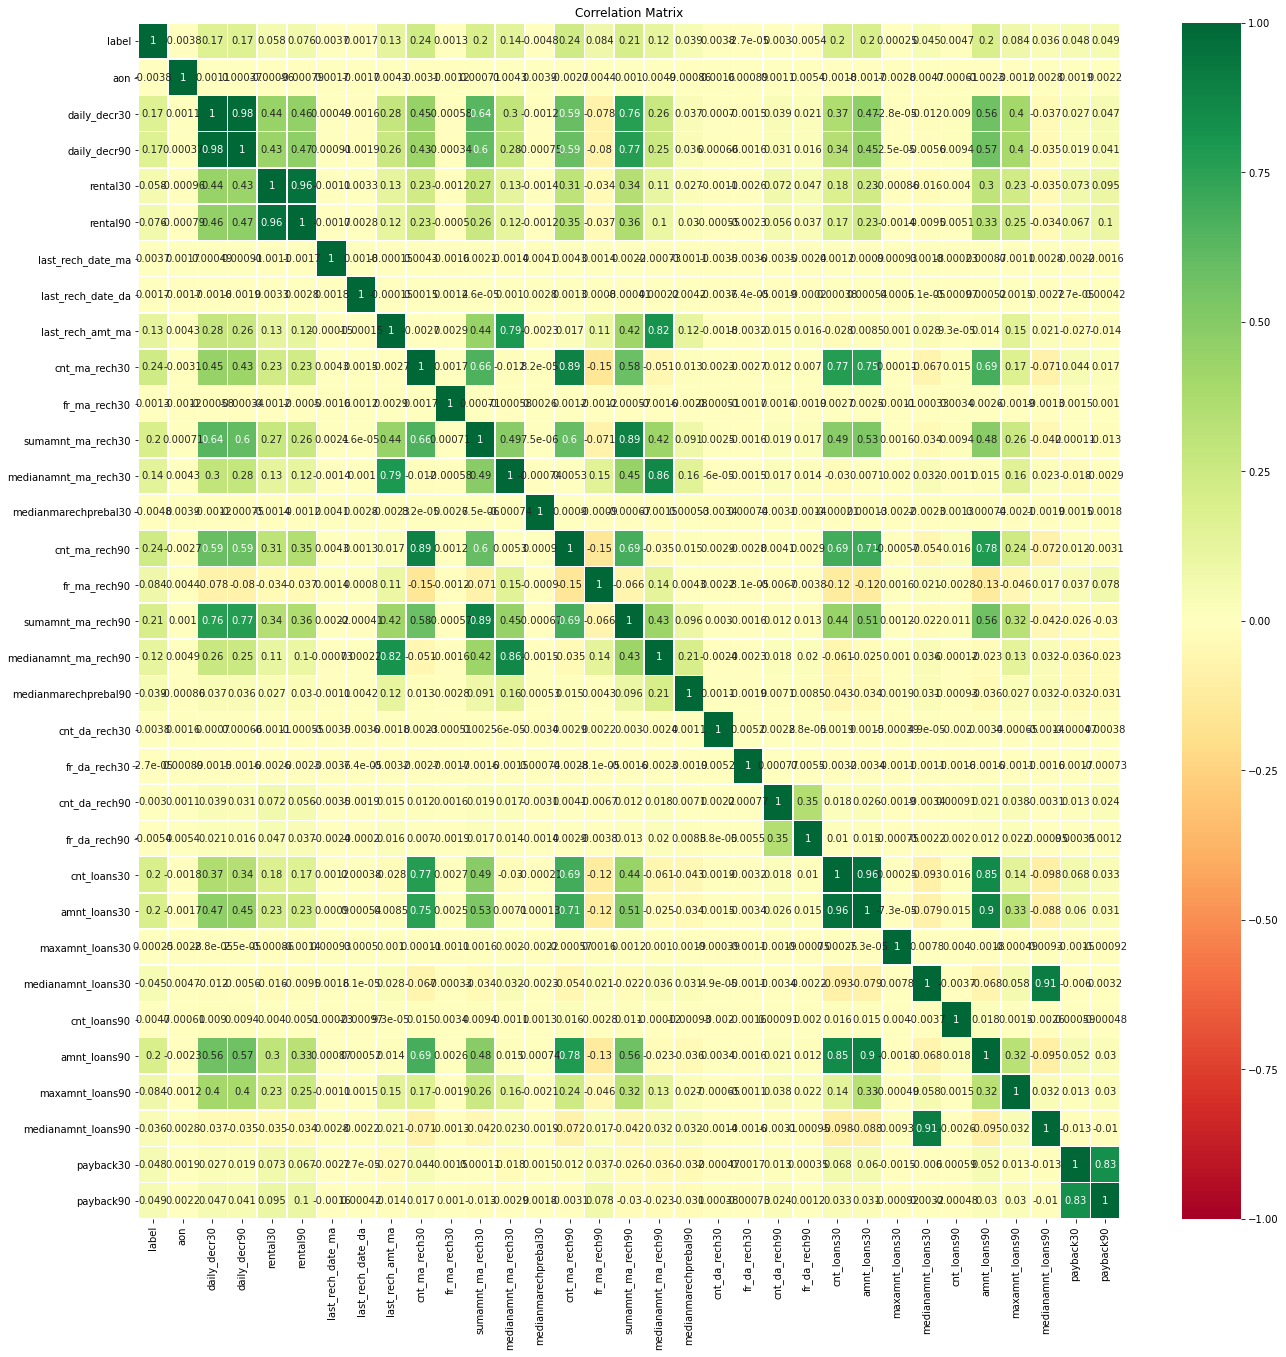

In [11]:
#Checking for correlation using visulaization

plt.figure(figsize=[22,22])
sns.heatmap(m_loan_corr_matrix,vmin=-1,vmax=1,linewidths=.5,annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix')
plt.show()

In [12]:
# Find all correlations and sort 
m_loan_corr_matrix['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
maxamnt_loans30         0.000248
fr_da_rech30           -0.000027
aon       

In [13]:
#value counts for label attribute to see class imbalancing
m_loan_ds['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

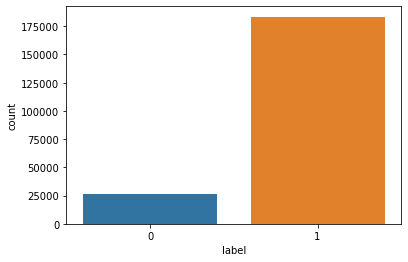

In [14]:
#Visualization of count plot
sns.countplot(m_loan_ds['label'])
#m_loan_ds['maxamnt_loans90'].value_counts(normalize = True)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
   

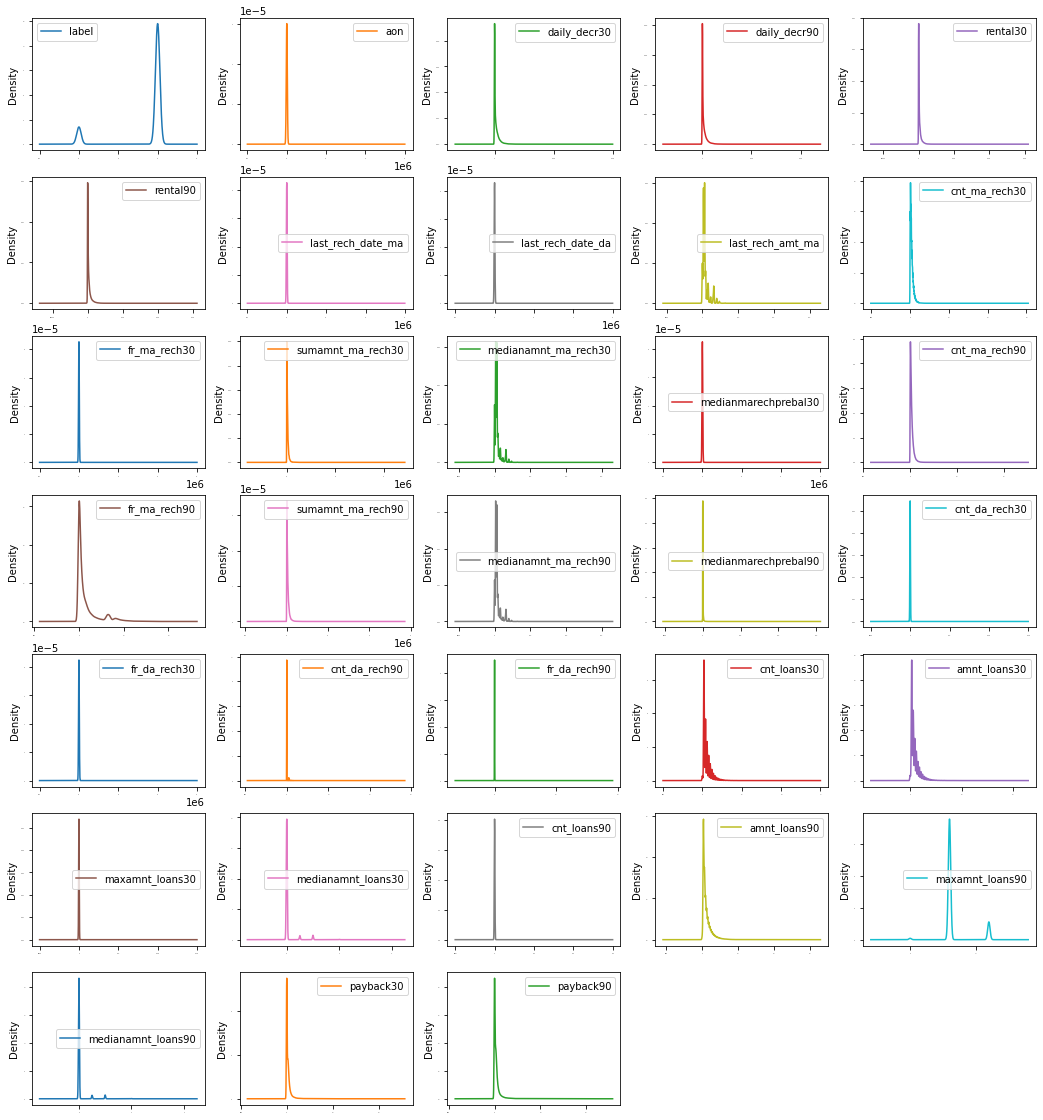

In [15]:
### Exploratory Data Analysis

m_loan_ds.plot(kind='density',subplots=True,layout=(7,5),sharex=False,fontsize=1,figsize=(18,20))

<AxesSubplot:xlabel='amnt_loans90', ylabel='Count'>

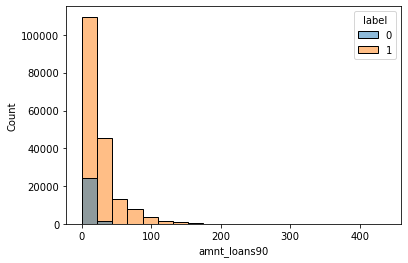

In [16]:
sns.histplot(data=m_loan_ds, x="amnt_loans90", hue="label",bins=20)

<AxesSubplot:xlabel='maxamnt_loans90', ylabel='Count'>

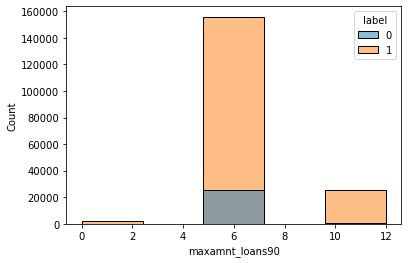

In [17]:
sns.histplot(data=m_loan_ds, x="maxamnt_loans90", hue="label",bins=5)

<AxesSubplot:xlabel='cnt_loans90', ylabel='Count'>

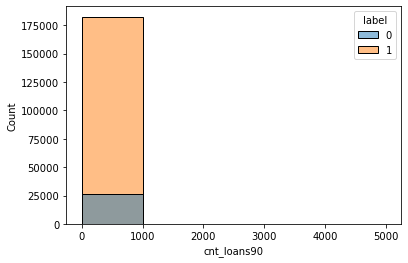

In [18]:
sns.histplot(data=m_loan_ds, x="cnt_loans90", hue="label",bins=5)

<AxesSubplot:xlabel='medianamnt_loans30', ylabel='Count'>

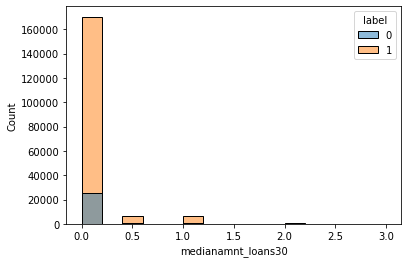

In [19]:
sns.histplot(data=m_loan_ds, x="medianamnt_loans30",hue="label",bins=15)

<AxesSubplot:xlabel='amnt_loans30', ylabel='Count'>

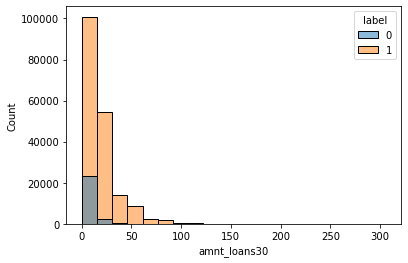

In [20]:
sns.histplot(data=m_loan_ds, x="amnt_loans30", hue="label",bins=20)

<AxesSubplot:xlabel='cnt_loans30', ylabel='Count'>

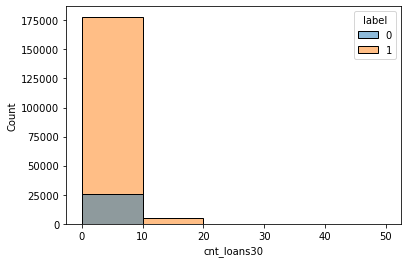

In [21]:
sns.histplot(data=m_loan_ds, x="cnt_loans30", hue="label",bins=5)

In [22]:
# dropping pdate column 
m_loan_ds.drop(labels=['pdate'],axis=1,inplace=True)
m_loan_ds.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0          21.0             3078.0                1539.0   
1           0.0             5787.0                5787.0   
2           0.0             1539.0                1539.0   
3           0.0                0.0                   0.0   
4           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  
0                 0.0  29.000000  29.000000  
1                 0.0   0.000000   0.000000  
2                 0.0   0.000000   0.000000  
3                 0.0   0.000000   0.000000  
4                 0.0   2.333333   2.333333

In [23]:
print(m_loan_ds.columns,'\n')
print('total variables---->',len(m_loan_ds.columns))

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object') 

total variables----> 33


Text(0.5, 1.0, 'Comparison between daily_decr90 and daily_decr30')

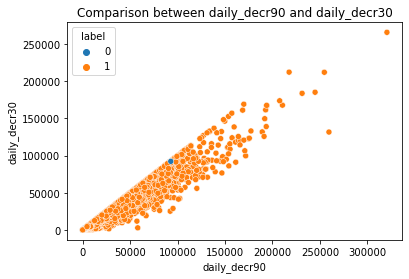

In [24]:
#scatter plot
#Bivariate analysis
sns.scatterplot(m_loan_ds['daily_decr90'],m_loan_ds['daily_decr30'],hue=m_loan_ds['label'])
plt.title('Comparison between daily_decr90 and daily_decr30')

Text(0.5, 1.0, 'Comparison between rental30 and daily_decr30')

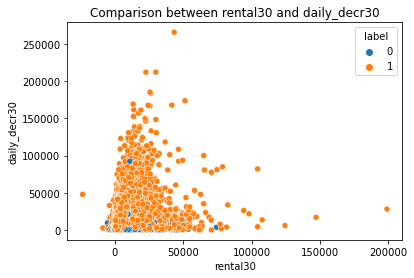

In [25]:
sns.scatterplot(m_loan_ds['rental30'],m_loan_ds['daily_decr30'],hue=m_loan_ds['label'])
plt.title('Comparison between rental30 and daily_decr30')

Text(0.5, 1.0, 'Comparison between rental30 and rental90')

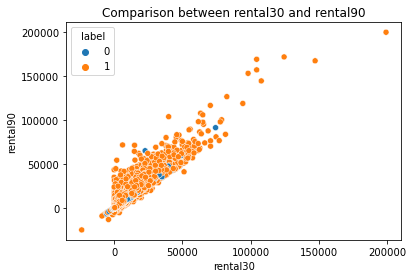

In [26]:
sns.scatterplot(m_loan_ds['rental30'],m_loan_ds['rental90'],hue=m_loan_ds['label'])
plt.title('Comparison between rental30 and rental90')

Text(0.5, 1.0, 'Comparison between payback30 and payback90')

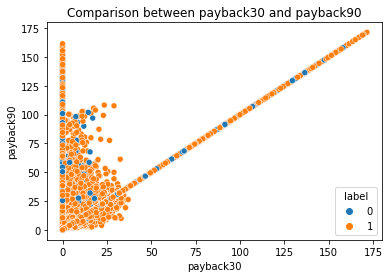

In [27]:
sns.scatterplot(m_loan_ds['payback30'],m_loan_ds['payback90'],hue=m_loan_ds['label'])
plt.title('Comparison between payback30 and payback90')

Text(0.5, 1.0, 'Comparison between amnt_loans30 and amnt_loans90')

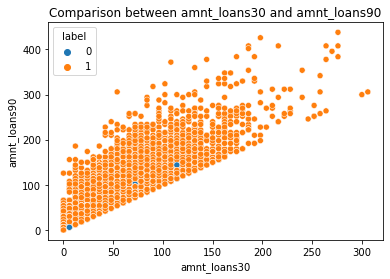

In [28]:
sns.scatterplot(m_loan_ds['amnt_loans30'],m_loan_ds['amnt_loans90'],hue=m_loan_ds['label'])
plt.title('Comparison between amnt_loans30 and amnt_loans90')

Text(0.5, 1.0, 'Comparison between maxamnt_loans30 and maxamnt_loans90')

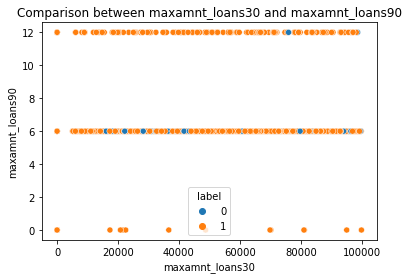

In [29]:
sns.scatterplot(m_loan_ds['maxamnt_loans30'],m_loan_ds['maxamnt_loans90'],hue=m_loan_ds['label'])
plt.title('Comparison between maxamnt_loans30 and maxamnt_loans90')

Text(0.5, 1.0, 'Comparison between medianamnt_loans30 and medianamnt_loans90')

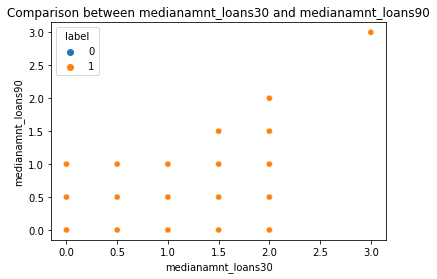

In [30]:
sns.scatterplot(m_loan_ds['medianamnt_loans30'],m_loan_ds['medianamnt_loans90'],hue=m_loan_ds['label'])
plt.title('Comparison between medianamnt_loans30 and medianamnt_loans90')

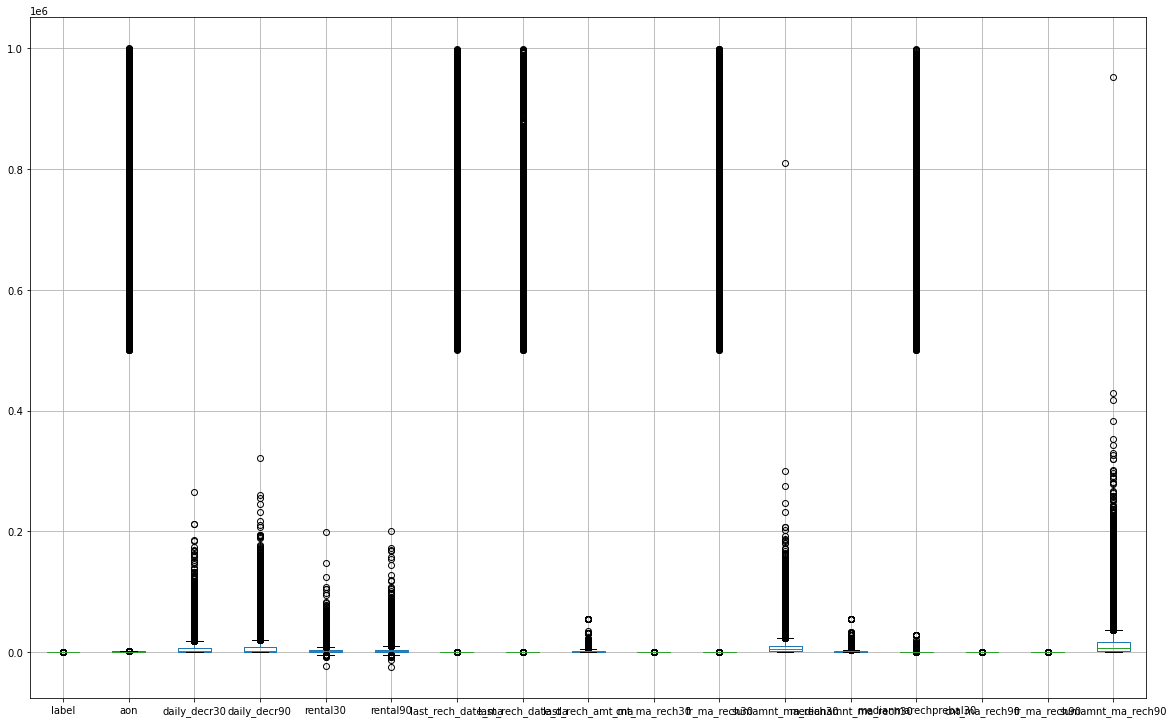

In [31]:
###checking for outliers

#Checking for outliers for first 16 rows
m_loan_ds.iloc[:,:17].boxplot(figsize=[20,15])
plt.subplots_adjust(bottom=0.25)
plt.show()

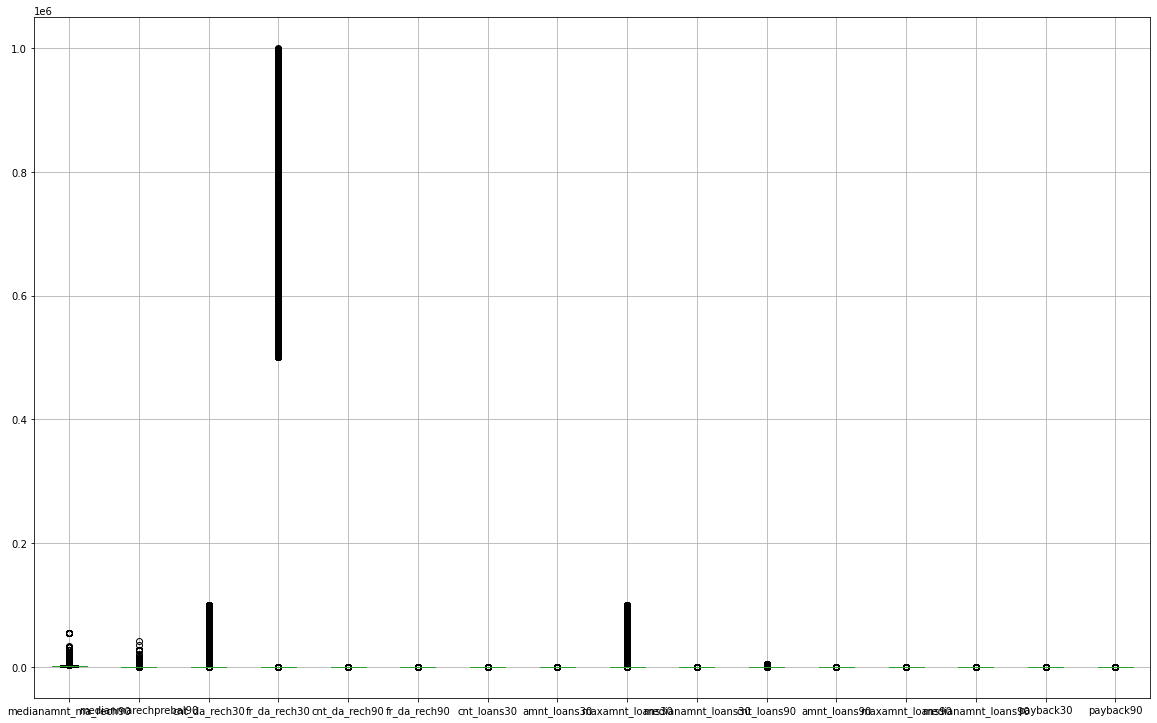

In [32]:
#Checking for outliers for remaining rows
m_loan_ds.iloc[:,17:].boxplot(figsize=[20,15])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [33]:
#Checking skewness
m_loan_ds.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

In [34]:
#Spliiting instances and target variable

x= m_loan_ds.drop('label',axis=1)
y=m_loan_ds['label']

In [35]:
x.shape

(209593, 32)

In [36]:
y.shape

(209593,)

In [37]:
m_loan_ds.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

In [38]:
#Handling class imbalance problem by oversampling the minority
#!pip install imblearn


In [39]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)

In [40]:
y_over.value_counts()

1    183431
0    183431
Name: label, dtype: int64

In [41]:
x_over.shape

(366862, 32)

In [42]:
y_over.shape

(366862,)

In [43]:
#Creating train-test split

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [44]:
#Finding out best random state
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is : ',maxAccu,'on random state :' ,maxRS)

Best Accuracy is :  0.7385947537230031 on random state : 3


In [46]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(256803, 32)
(110059, 32)
(256803,)
(110059,)


In [47]:
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=23)

In [48]:
#importing libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [49]:
#RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)

# Summary of the predictions made by the classifier

print('The confusion matrix :',confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

# Accuracy score
print('Accuracy score for Random Forest Classifier is :',accuracy_score(y_test,pred))

The confusion matrix : [[51093  3744]
 [ 2979 52243]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     54837
           1       0.93      0.95      0.94     55222

    accuracy                           0.94    110059
   macro avg       0.94      0.94      0.94    110059
weighted avg       0.94      0.94      0.94    110059

Accuracy score for Random Forest Classifier is : 0.9389145821786496


In [50]:
#DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)

# Summary of the predictions made by the classifier

print('The confusion matrix :',confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

# Accuracy score
print('Accuracy score for DecisionTreeClassifier is :',accuracy_score(y_test,pred))

The confusion matrix : [[49353  5484]
 [ 6266 48956]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89     54837
           1       0.90      0.89      0.89     55222

    accuracy                           0.89    110059
   macro avg       0.89      0.89      0.89    110059
weighted avg       0.89      0.89      0.89    110059

Accuracy score for DecisionTreeClassifier is : 0.8932390808566314


In [51]:
#SVC
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5)

clf.fit(x_train, y_train.ravel()) 

pred=clf.predict(x_test)

# Summary of the predictions made by the classifier

print('The confusion matrix :',confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

# Accuracy score
print('Accuracy score for LinearSVC is :',accuracy_score(y_test,pred))

The confusion matrix : [[41440 13397]
 [30354 24868]]
              precision    recall  f1-score   support

           0       0.58      0.76      0.65     54837
           1       0.65      0.45      0.53     55222

    accuracy                           0.60    110059
   macro avg       0.61      0.60      0.59    110059
weighted avg       0.61      0.60      0.59    110059

Accuracy score for LinearSVC is : 0.6024768533241261


In [52]:
#AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
pred=ad.predict(x_test)


# Summary of the predictions made by the classifier
print('The confusion matrix :',confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

# Accuracy score
print('Accuracy score for AdaBoostClassifier is :',accuracy_score(y_test,pred))

The confusion matrix : [[48315  6522]
 [ 8038 47184]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     54837
           1       0.88      0.85      0.87     55222

    accuracy                           0.87    110059
   macro avg       0.87      0.87      0.87    110059
weighted avg       0.87      0.87      0.87    110059

Accuracy score for AdaBoostClassifier is : 0.8677073206189407


In [70]:
# ExtraTreeClassifier
from sklearn.tree import ExtraTreeClassifier

ETC = ExtraTreeClassifier()
ETC.fit(x_train, y_train)

pred = ETC.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, pred))
print('The confusion matrix :',confusion_matrix(y_test, pred))

# Accuracy score
print('Accuracy score for ExtraTreeClassifier is :',accuracy_score(pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     54837
           1       0.89      0.87      0.88     55222

    accuracy                           0.88    110059
   macro avg       0.88      0.88      0.88    110059
weighted avg       0.88      0.88      0.88    110059

The confusion matrix : [[48625  6212]
 [ 7360 47862]]
Accuracy score for ExtraTreeClassifier is : 0.8766843238626555


In [54]:
# BaggingClassifier
from sklearn.ensemble import BaggingClassifier

Bag = BaggingClassifier()
Bag.fit(x_train, y_train)

pred = Bag.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, pred))
print('The confusion matrix :',confusion_matrix(y_test, pred))

# Accuracy score
print('Accuracy score for BaggingClassifier is :',accuracy_score(pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     54837
           1       0.93      0.92      0.93     55222

    accuracy                           0.93    110059
   macro avg       0.93      0.93      0.93    110059
weighted avg       0.93      0.93      0.93    110059

The confusion matrix : [[51183  3654]
 [ 4319 50903]]
Accuracy score for BaggingClassifier is : 0.9275570375889296


In [55]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

GB = BaggingClassifier()
GB.fit(x_train, y_train)

pred = GB.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, pred))
print('The confusion matrix :',confusion_matrix(y_test, pred))

# Accuracy score
print('Accuracy score for GradientBoostingClassifier is :',accuracy_score(pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     54837
           1       0.93      0.92      0.93     55222

    accuracy                           0.93    110059
   macro avg       0.93      0.93      0.93    110059
weighted avg       0.93      0.93      0.93    110059

The confusion matrix : [[51113  3724]
 [ 4408 50814]]
Accuracy score for GradientBoostingClassifier is : 0.9261123579171172


In [56]:
#importing cross val library
from sklearn.model_selection import cross_val_score

In [57]:
print('cross_val_score for RandomForestClassifier:',cross_val_score(RFC,x_over,y_over,cv=5).mean())

cross_val_score for RandomForestClassifier: 0.9371618591590739


In [58]:
print('cross_val_score for DecisionTreeClassifier:',cross_val_score(DTC,x_over,y_over,cv=5).mean())

cross_val_score for DecisionTreeClassifier: 0.8931425551602971


In [59]:
print('cross_val_score for SVC:',cross_val_score(clf,x_over,y_over,cv=5).mean())

cross_val_score for SVC: 0.6359229326302243


In [60]:
print('cross_val_score for AdaBoostClassifier:',cross_val_score(ad,x_over,y_over,cv=5).mean())

cross_val_score for AdaBoostClassifier: 0.861751965119405


In [61]:
print('cross_val_score for ExtraTreeClassifier:',cross_val_score(ETC,x_over,y_over,cv=5).mean())

cross_val_score for ExtraTreeClassifier: 0.8767248810483377


In [62]:
print('cross_val_score for BaggingClassifier:',cross_val_score(Bag,x_over,y_over,cv=5).mean())

cross_val_score for BaggingClassifier: 0.9225323694104267


In [63]:
print('cross_val_score for GradientBoostingClassifier:',cross_val_score(GB,x_over,y_over,cv=5).mean())

cross_val_score for GradientBoostingClassifier: 0.923025743995621


In [64]:
#Finding out best model:

#Accuracy score is substracted from cross_val_score

RFC= 0.9392-0.9372
print('RFC :',RFC)

DTC= 0.895-0.8932
print('DTC :',DTC)

clf= 0.5873-0.6708
print('clf :',clf)

ad= 0.8687-0.8613
print('ad :',ad)

ETC= 0.869-0.876
print('ETC :',ETC)

Bag= 0.9273-0.9223
print('Bag :',Bag)

GB= 0.9273-0.9234
print('GB :',GB)



RFC : 0.0020000000000000018
DTC : 0.0018000000000000238
clf : -0.08349999999999991
ad : 0.007400000000000073
ETC : -0.0048000000000000265
Bag : 0.0050000000000000044
GB : 0.0039000000000000146


In [65]:
### Improving accuracy of the best model using hyper parameter tuning

##importing library
from sklearn.model_selection import GridSearchCV

#defining parameters
parameter={'max_features':range(1,50),
          'criterion':['gini','entropy']}

# Building the model
GCV=GridSearchCV(ExtraTreeClassifier(),parameter,cv=5,scoring='accuracy')

# Training the model
GCV.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=ExtraTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': range(1, 50)},
             scoring='accuracy')

In [66]:
#checking for best parameters
GCV.best_params_

{'criterion': 'entropy', 'max_features': 28}

In [67]:
#Creating Final Model

finalmod=ExtraTreeClassifier(criterion='entropy',max_features=30)
finalmod.fit(x_train,y_train)
pred=finalmod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

88.81509008804369


In [68]:
###visualizing the performance of the multi-class classification problem 

##using AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve.

#importing library to visualize auc-roc score and roc curve.

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics


In [71]:
y_prob=ETC.predict_proba(x_test)[:,1]   # This will give positive class prediction probabilities  

In [72]:
pred=ETC.predict(x_test)
print(pred)

[0 1 1 ... 1 0 1]


In [73]:
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.

In [74]:
ETC.score(x_test, y_pred)

1.0

In [75]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.8767193034132685

In [76]:
fpr,tpr,thresholds=roc_curve(y_test,y_prob)

In [77]:
fpr  #False Positive Rate

array([0.        , 0.11328118, 0.11346354, 0.11351824, 0.1137006 ,
       0.11397414, 0.11404708, 0.1141565 , 0.11428415, 0.11452122,
       0.11492241, 0.11508653, 1.        ])

In [78]:
tpr    # True Positive Rate

array([0.        , 0.86671979, 0.86673789, 0.86677411, 0.86677411,
       0.86677411, 0.86677411, 0.86677411, 0.86677411, 0.86677411,
       0.86677411, 0.86677411, 1.        ])

In [79]:
thresholds

array([2.        , 1.        , 0.5       , 0.25      , 0.2       ,
       0.16666667, 0.125     , 0.11111111, 0.08333333, 0.04545455,
       0.02702703, 0.02222222, 0.        ])

In [80]:
roc_auc = auc(fpr, tpr)
roc_auc

0.8766231204820738

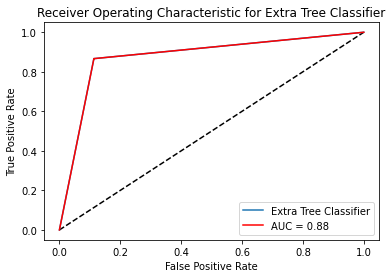

In [81]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Extra Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis('tight')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic for Extra Tree Classifier')
plt.show()

In [82]:
#saving the model for deployment to client

import joblib

joblib.dump(ETC,'micro_cedit_etc.obj')

['micro_cedit_etc.obj']